## Import the libraries

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 15)

## Read the metadata

In [5]:
all_data_info = pd.read_csv("../data/all_data_info.csv")
all_data_info = all_data_info[["artist","date","genre","source","style","title","new_filename"]]
all_data_info["date"] = all_data_info["date"].str.extract('(\d+)')
all_data_info = all_data_info.dropna(subset=['date'])
all_data_info["date"] = all_data_info["date"].astype(int)

## Plots

### All data

#### Styles Distribution

In [3]:
sytle_dist = all_data_info.groupby('style').count()[['artist']]
sytle_dist.reset_index(inplace=True)
fig1 = px.treemap(sytle_dist, path=['style'], values = 'artist', width=800, height=800)
fig1.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=100,
        color="RebeccaPurple"
    )
)
fig1.show()

#### Year Distribution

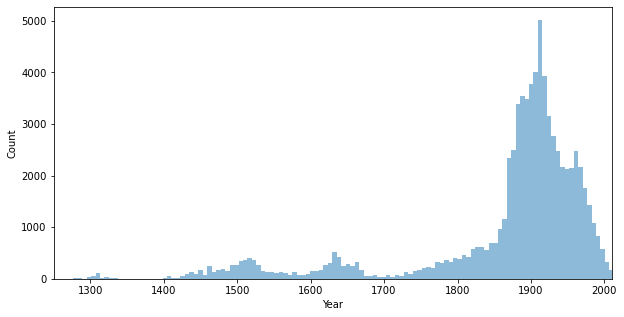

In [4]:
plt.figure(figsize=(10,5))
plt.hist(all_data_info.date, bins=300, alpha=0.5)
plt.xlim(1250,2010)
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('date1.png')
plt.show()

#### Source Distribution of All Data

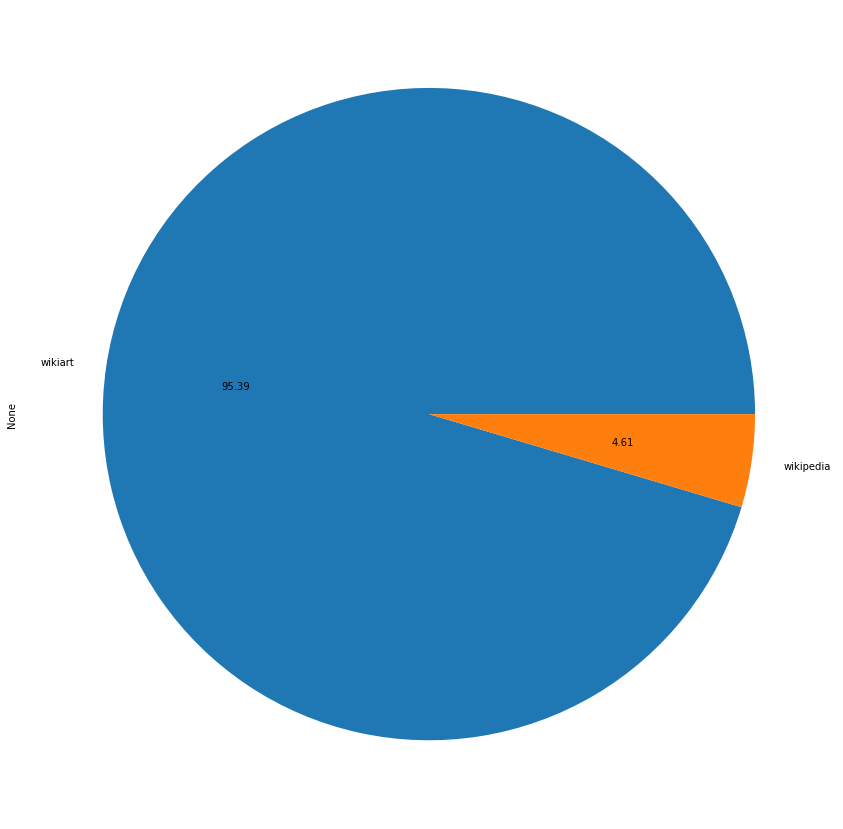

In [6]:
all_data_info.groupby('source').size().plot(kind='pie', autopct='%.2f');
plt.show()

### Portraits

In [72]:
portrait_info = all_data_info[((all_data_info["genre"]=="portrait") | (all_data_info["genre"]=="self-portrait"))]
portrait_info = portrait_info[portrait_info['date']<=1800]
portrait_info.head()

,artist,date,genre,source,style,title,new_filename
32,Diego Velazquez,1645,self-portrait,wikiart,Baroque,Self-portrait,70728.jpg
37,Titian,1562,self-portrait,wikiart,Mannerism (Late Renaissance),Self-portrait,15715.jpg
38,Gerrit Dou,1635,self-portrait,wikiart,Baroque,Self Portrait,59486.jpg
48,Jan van Eyck,1433,portrait,wikiart,Northern Renaissance,A Man in a Turban,65895.jpg
73,Lorenzo Lotto,1547,portrait,wikiart,High Renaissance,Portrait of Giovanni della Volta with his Wife...,5194.jpg


#### Styles Distribution

In [73]:
sytle_dist = portrait_info.groupby('style').count()[['artist']]
sytle_dist.reset_index(inplace=True)
fig2 = px.treemap(sytle_dist, path=['style'], values = 'artist', width=800, height=800)
fig2.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=100,
        color="RebeccaPurple"
    )
)
fig2.show()

#### Year Distribution of Portraits

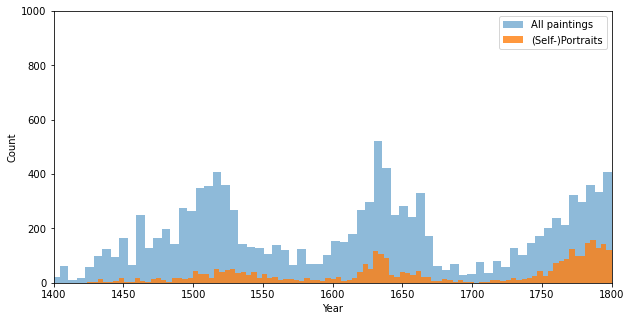

In [97]:
plt.figure(figsize=(10,5))
plt.hist(all_data_info.date, bins=300, alpha=0.5)
plt.hist(portrait_info.date, bins=100, alpha=0.8)
plt.xlim(1400,1800)
plt.ylim(0,1000)#
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['All paintings','(Self-)Portraits'])
plt.savefig('date2.png')
plt.show()

#### Year Distribution of Styles

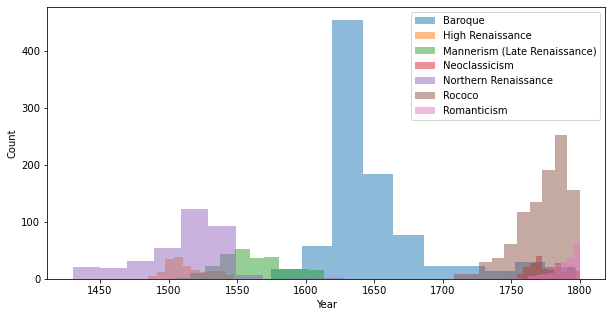

In [113]:
plt.figure(figsize=(10,5))
plt.hist(portrait_info[portrait_info["style"]=="Baroque"].date, alpha=0.5)
plt.hist(portrait_info[portrait_info["style"]=="High Renaissance"].date,alpha=0.5)
plt.hist(portrait_info[portrait_info["style"]=="Mannerism (Late Renaissance)"].date, alpha=0.5)
plt.hist(portrait_info[portrait_info["style"]=="Neoclassicism"].date, alpha=0.5)
plt.hist(portrait_info[portrait_info["style"]=="Northern Renaissance"].date, alpha=0.5)
plt.hist(portrait_info[portrait_info["style"]=="Rococo"].date, alpha=0.5)
plt.hist(portrait_info[portrait_info["style"]=="Romanticism"].date, alpha=0.5)
plt.legend(['Baroque', 'High Renaissance', 'Mannerism (Late Renaissance)','Neoclassicism', 'Northern Renaissance', 'Rococo', 'Romanticism'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('styledate1.png')
plt.show()

### Portraits Containing dogs

In [81]:
with open('../data/files_containing_dogs_filtered.txt', 'r') as file_in:
    painting_list = []
    for line in file_in:
        painting_list.append(line[:-1])

#### Styles Distribution

In [111]:
dog_info = portrait_info[portrait_info["new_filename"].isin(painting_list)]
sytle_dist = dog_info.groupby('style').count()[['artist']]
sytle_dist.reset_index(inplace=True)
fig3 = px.treemap(sytle_dist, path=['style'], values = 'artist', width=800, height=800)

fig3.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=100,
        color="RebeccaPurple"
    )
)
fig3.show()


#### Year Distribution of Portraits with Dogs

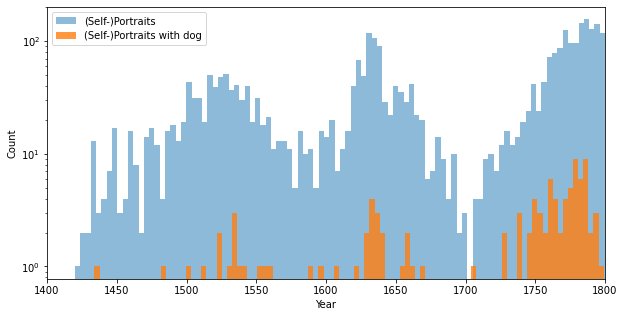

In [99]:
plt.figure(figsize=(10,5))
plt.hist(portrait_info.date, bins = 100, alpha=0.5)
plt.hist(dog_info.date, bins = 100, alpha=0.8)
plt.xlim(1400,1800)
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['(Self-)Portraits','(Self-)Portraits with dog'])
plt.savefig('date3.png')
plt.show()

#### Year Distribution of Styles

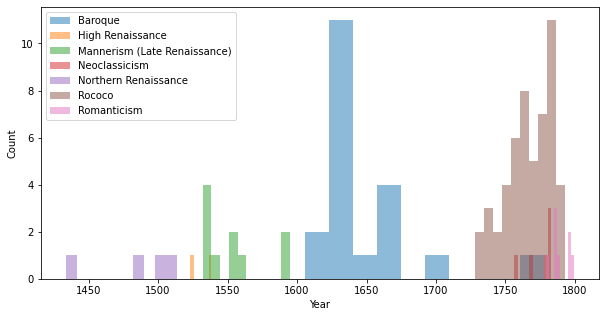

In [114]:
plt.figure(figsize=(10,5))
plt.hist(dog_info[dog_info["style"]=="Baroque"].date, alpha=0.5)
plt.hist(dog_info[dog_info["style"]=="High Renaissance"].date,alpha=0.5)
plt.hist(dog_info[dog_info["style"]=="Mannerism (Late Renaissance)"].date, alpha=0.5)
plt.hist(dog_info[dog_info["style"]=="Neoclassicism"].date, alpha=0.5)
plt.hist(dog_info[dog_info["style"]=="Northern Renaissance"].date, alpha=0.5)
plt.hist(dog_info[dog_info["style"]=="Rococo"].date, alpha=0.5)
plt.hist(dog_info[dog_info["style"]=="Romanticism"].date, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Baroque', 'High Renaissance', 'Mannerism (Late Renaissance)','Neoclassicism', 'Northern Renaissance', 'Rococo', 'Romanticism'])
plt.savefig('styledate2.png')
plt.show()

### Countries of Origins of Painters

In [117]:
import os
path = "../json"
nationality = pd.DataFrame()
for filename in os.listdir(path):
    f = os.path.join(path, filename)
    # checking if it is a file
    if os.path.isfile(f):
        print(filename)
    if f.endswith(".json"):
        df = pd.read_json(f)
        nationality = pd.concat([nationality, df])

norway.json
finland.json
japan.json
brazil.json
turkey.json
.DS_Store
switzerland.json
netherlands.json
italy.json
poland.json
romania.json
china.json
austria.json
ukraine.json
portugal.json
ireland.json
greece.json
spain.json
denmark.json
hungary.json
germany.json
britain.json
belgium.json
france.json
usa.json
russia.json
sweden.json


In [118]:
import unicodedata

def strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

In [119]:
nationality = nationality.rename(columns={"painterLabel": "artist", "countryLabel": "nationality"})
nationality["artist"] = nationality["artist"].apply(strip_accents)
nationality

,artist,nationality
0,Alfredo Andersen,Brazil
1,Peter Andreas Brandt,Brazil
2,Zdenka Rusova,Czechoslovakia
3,Lambert van Haven,Denmark
4,Peder Severin Kryer,Denmark
...,...,...
3832,Arthur Lingquist,United States of America
3833,Oscar Anderson,United States of America
3834,Oscar Jacobson,United States of America
3835,Britt Haglid,United States of America


In [120]:
all_data_info = all_data_info.merge(nationality, on='artist', how='left')

#### Countries Distribution of all paintings

In [137]:
nationality_dist = all_data_info.groupby('nationality').count()[['artist']]
nationality_dist.reset_index(inplace=True)
fig4 = px.treemap(nationality_dist, path=['nationality'], values = 'artist', width=1800, height=1800)

fig4.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=200,
        color="RebeccaPurple"
    )
)
fig4.show()

#### Countries Distribution of portraits with dog

In [138]:
dog_painting = pd.read_csv("../data/dog_paintings.csv")

In [139]:
nationality_dist = dog_painting.groupby('nationality').count()[['artist']]
nationality_dist.reset_index(inplace=True)
fig5 = px.treemap(nationality_dist, path=['nationality'], values = 'artist', width=1800, height=1800)

fig5.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=200,
        color="RebeccaPurple"
    )
)
fig5.show()

In [ ]:
fig5.write_image("nationality5.png")